# Explore here

In [57]:
# Your code here

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.info(   )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


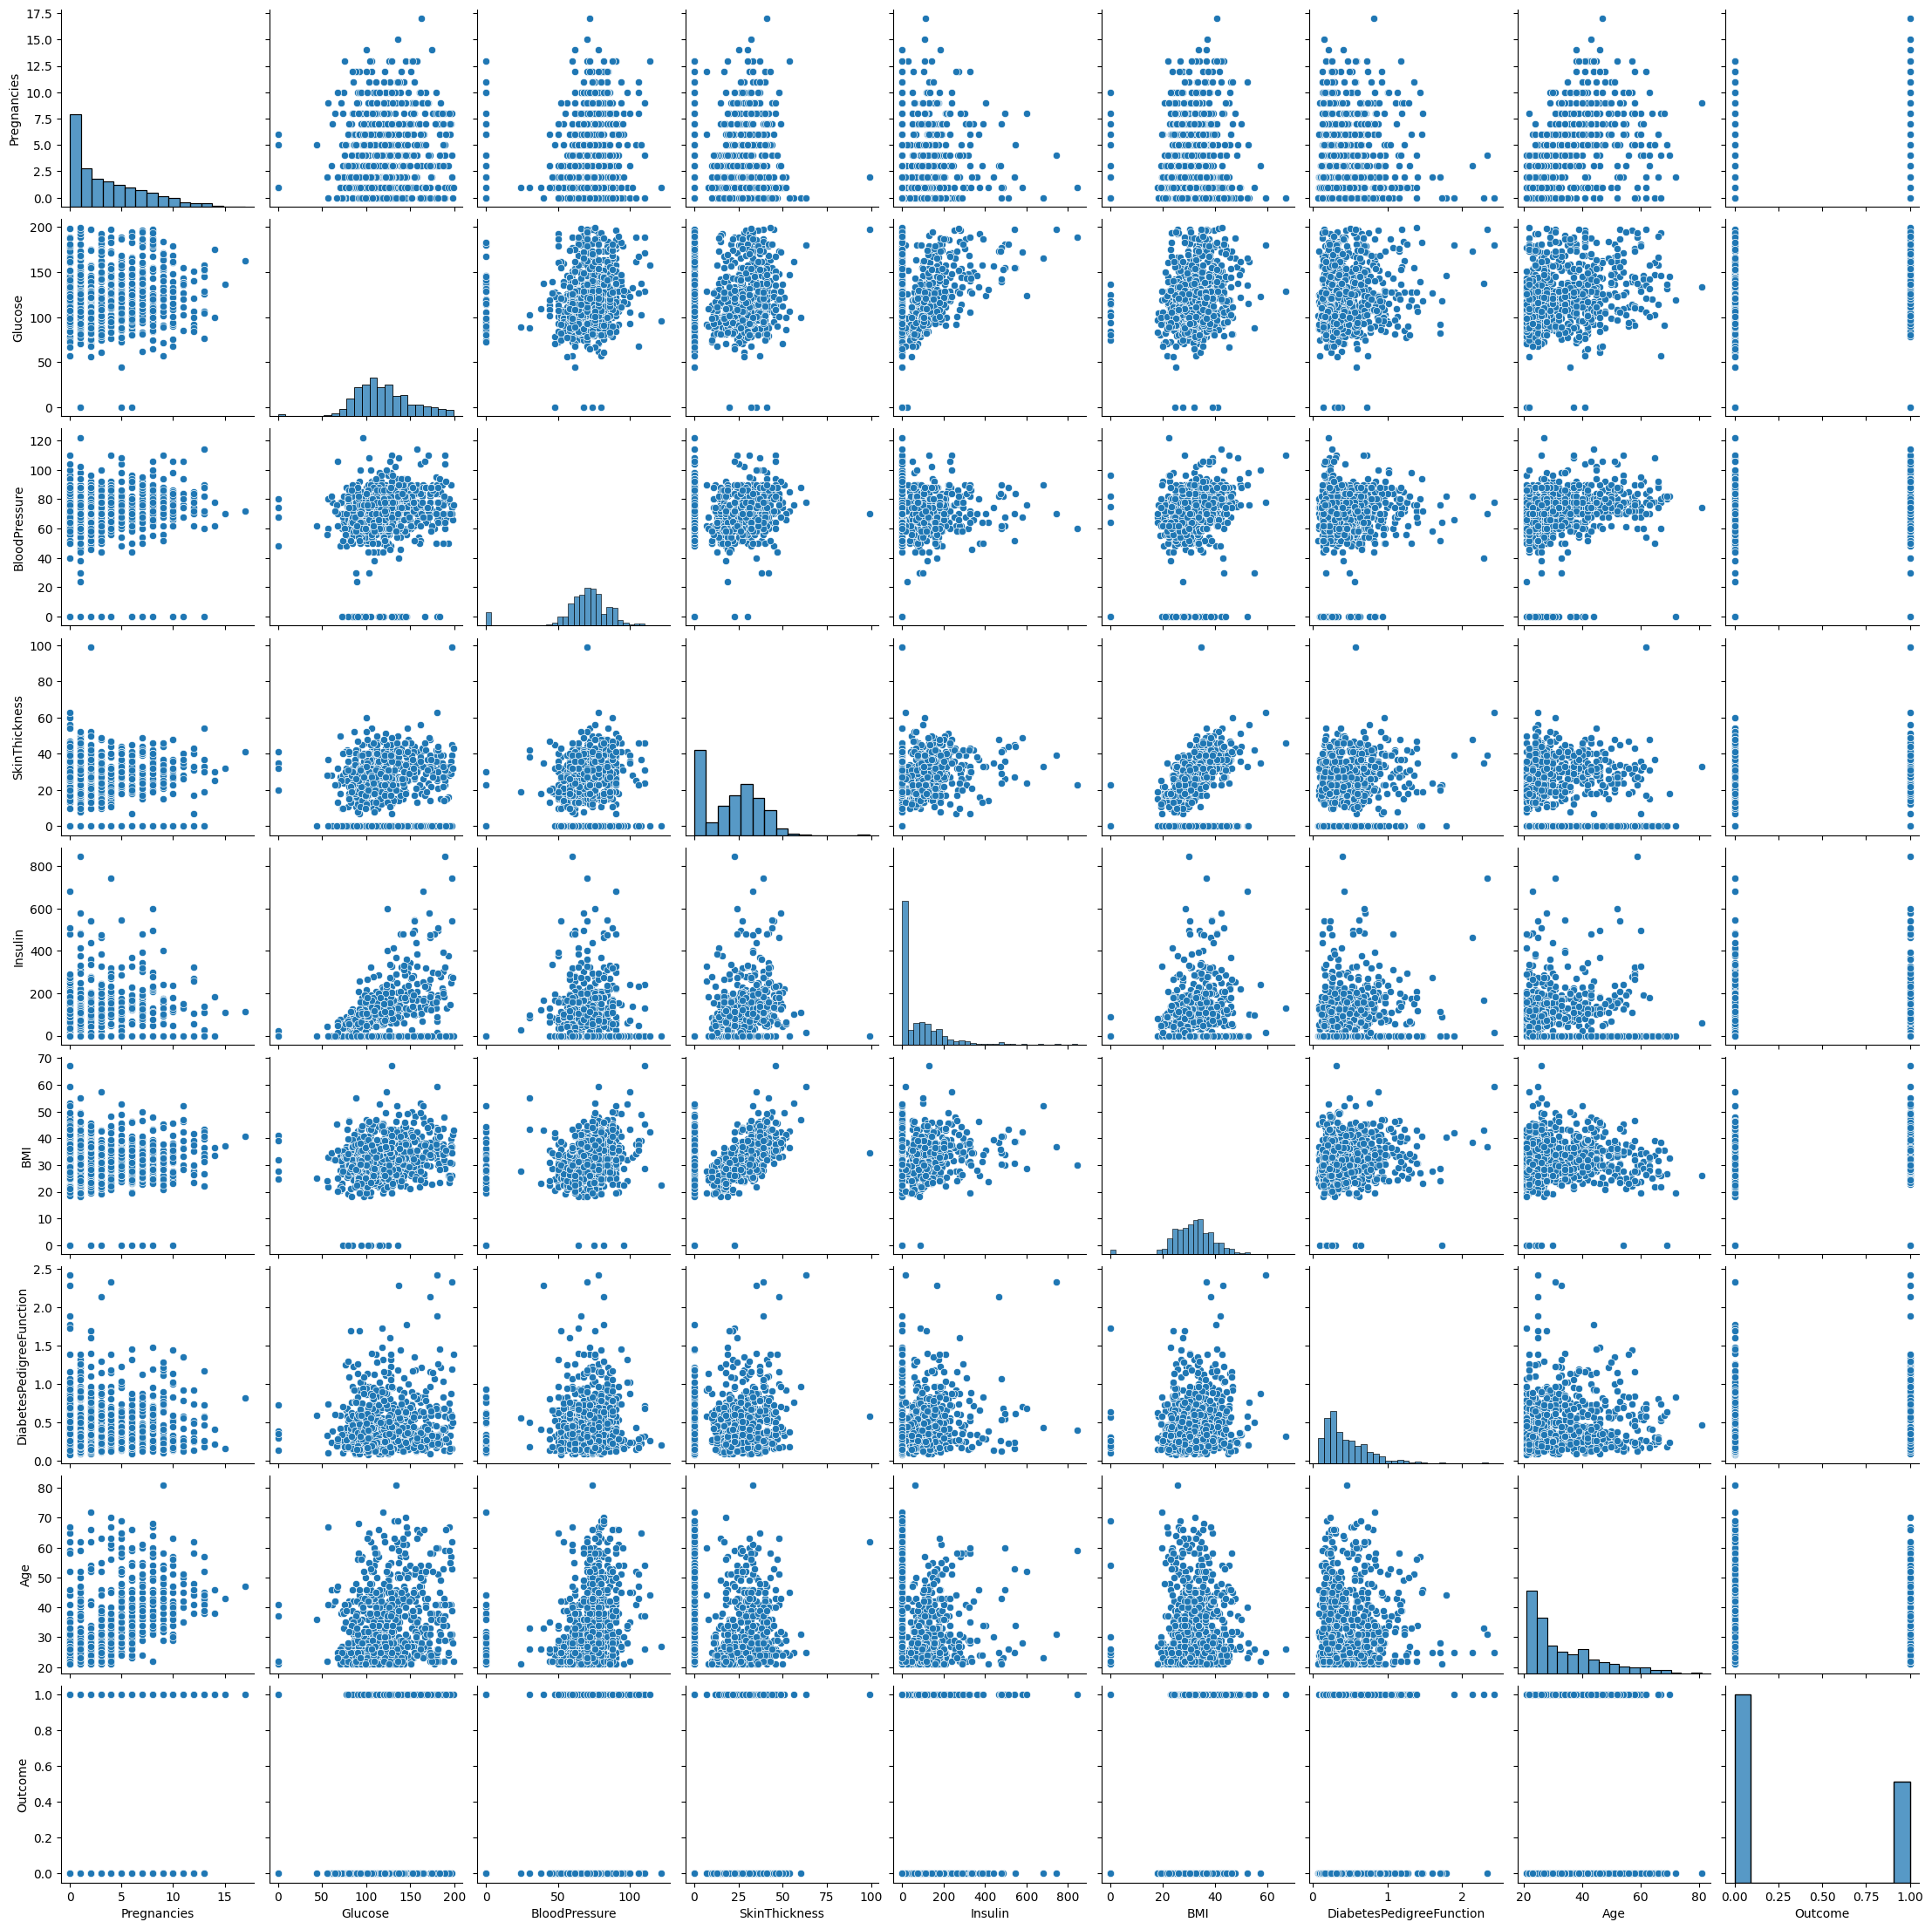

In [59]:
import seaborn as sns

sns.pairplot(df)

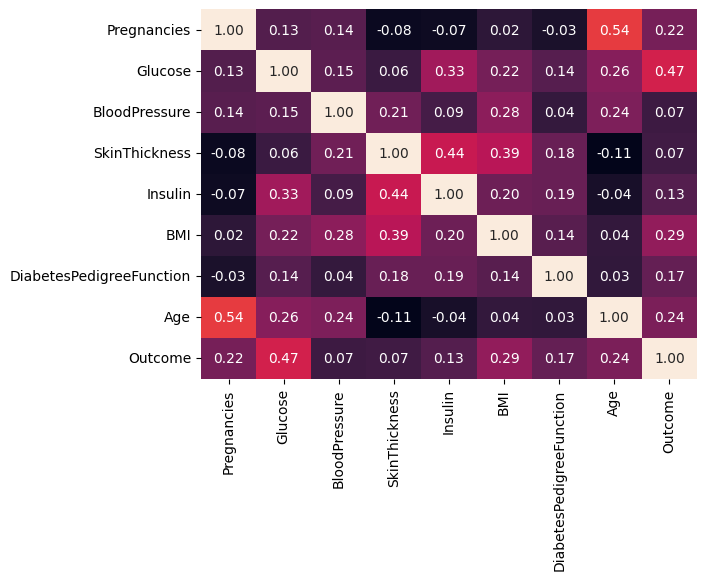

In [60]:
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True,fmt=".2f", cbar=False)

plt.show()

In [61]:
df["BloodPressure"].replace(0, df.loc[df['BloodPressure'] > 0, 'BloodPressure'].mean(), inplace=True)

/tmp/ipykernel_5957/463291844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BloodPressure"].replace(0, df.loc[df['BloodPressure'] > 0, 'BloodPressure'].mean(), inplace=True)


In [62]:
X = df.drop(columns='Outcome')
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,72.405184,0,0,0.0,0.304,21
618,9,112,82.000000,24,0,28.2,1.282,50
346,1,139,46.000000,19,83,28.7,0.654,22
294,0,161,50.000000,0,0,21.9,0.254,65
231,6,134,80.000000,37,370,46.2,0.238,46


In [63]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


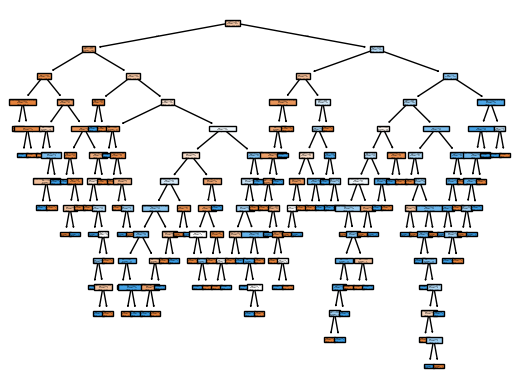

In [64]:
from sklearn import tree

tree.plot_tree(model,feature_names=X_train.columns,filled=True)

plt.show()

In [65]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [66]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.7337662337662337


In [67]:
param_grid = {
    'max_depth': [3,5,10],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}

In [68]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [69]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [70]:
best_model=grid.best_estimator_

y_best_pred = best_model.predict(X_test)

accuracy_score(y_test,y_best_pred)

0.7597402597402597

In [71]:
from pickle import dump

dump(best_model,open("../models/dt_classifier_gini_maxdepth_3_minsamplesplit_2_42.sav","wb"))

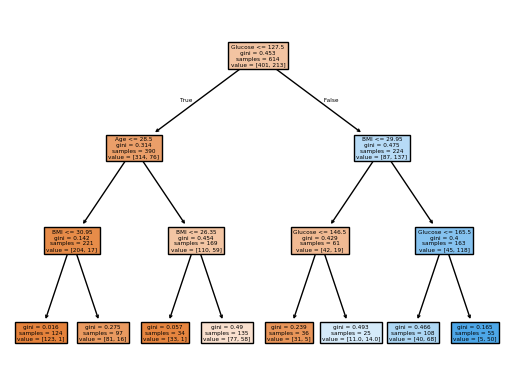

In [72]:

tree.plot_tree(best_model,feature_names=X_train.columns,filled=True)

plt.show()